# PCA技术的直观理解
数据降维的一大应用就是在保留重要信息的同时消除那些“无信息量的信息”

PCA主成分分析关注的是线性相关性

如果列空间的秩小于特征总数 那么多数特征就是几个关键特征的线性组合 换言之 这些特征可以由其他特征推导得到

PCA则试图将数据挤压到一个维度大大小于原空间的线性子空间

在一个二维空间中 如果数据是均匀分布在平面中 即两个轴的没有必然的相关性 那么就是满秩的

而如果点分布呈线性状 即第二维的数据和第一维的数据有明显的对应关系 那么就是低维度的 只用一个或1.5个维度去表示即可

PCA的核心思想是 **使用一些新特征代替冗余特征 这些新特征能恰当地总结初始特征空间中包含的信息**

新的数据点要减少维度 最大程度上保持信息量 信息量需要用数学方式去表现

可以使用每个数据点与均值之间的平均距离去定义 也就是方差 那么该问题就变成了需要使新特征空间中数据点的方差最大化

# PCA技术实现
1. 将原始数据中心化
2. 将中心化后的数据投影到目标向量V上(V是要确定的) V具有单位范数
3. 计算投影的方差
4. 优化目标为使得方差最大的向量V
5. V就是找出的主成分
总而言之 PCA技术就是找出一个能使输出向量的范数最大化的输入方向

In [ ]:
#PCA实践

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
digits_data = datasets.load_digits()
n = len(digits_data.images)

In [4]:
n
# 有1797个图像

1797

In [6]:
type(digits_data)

sklearn.utils.Bunch

In [7]:
type(digits_data.images)

numpy.ndarray

In [10]:
digits_data_images = digits_data.images

In [12]:
digits_data_images[0].shape
# 图像是8*8的

(8, 8)

In [13]:
image_data = digits_data_images.reshape((n,-1))
image_data.shape
# 等于对8*8做了flatten

(1797, 64)

In [14]:
labels = digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
pca_transformer = PCA(n_components=0.8)
# n_components意思是主成分能解释至少80%原来的方差
# n_components也可以使用整型数 意思为降维到多少

In [16]:
pca_images = pca_transformer.fit_transform(image_data)

In [17]:
type(pca_images)

numpy.ndarray

In [18]:
pca_images.shape
# 64维变成了13维

(1797, 13)

In [19]:
pca_transformer.explained_variance_ratio_
# 得到方差比例

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [20]:
pca_transformer.explained_variance_ratio_.sum()
# 所有方差比例之和0.8

0.8028957761040317

In [21]:
pca_transformer.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559,  59.10852489,  51.88453911,  44.01510667,
        40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
        21.90148814])

In [23]:
pca_transformer.n_components_
# 使用13维进行表示

13

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [26]:
pca_transformer.explained_variance_ratio_[0:3].sum()
# 前三个维度占据了40%的方差解释
# 对其可视化

0.4030395858767508

Text(0.5, 0, 'Principal component 3')

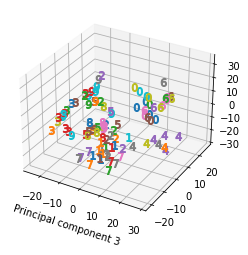

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(100):
    ax.scatter(pca_images[i,0],pca_images[i,1], pca_images[i,2],marker = r'${}$'.format(labels[i]),s = 64)
ax.set_xlabel('Principal component 1')
ax.set_xlabel('Principal component 2')
ax.set_xlabel('Principal component 3')

# 可以看到前三个主成分将数据分成了0,4,6一组 1,7,8 一组 3,9,一组等等 主成分分析将其映射到了三维空间进行可视化

# pca附加解释
由于pca中目标函数的正交限制 所以pca有一个好的附加效果：转换后的特征都是不相关的 内积为0

如果归一化把特征长度也变成1 称为白化

# PCA局限性与注意事项
## 注意事项
PCA在进行降维时 需要使用主成分的数目k 这个数值对最终结果有明显影响

但是我们可以不明确指定k而是使用百分比(上面的例子就是这样做的) 设置为能够解释一定比例的总方差

## 局限性
1. 计算过程复杂 得到的结果难以解释
2. 计算成本十分昂贵

不要对原始计数(单词计数 音乐播放技术 电影播放技术)使用PCA

因为在这样的样本中 很容易出现异常值 比如一个单词出现了很多次 一个用户把音乐播放了极其多次

PCA是寻找特征之间的线性相关性 进行降维 很容易受到一场大的值的干扰

用之前需要进行数据清洗 或者缩放转化等

# PCA总结
关于 PCA 需要记住的两件事是其机制（线性投影）和目标（最大化方差期望值）。

该解决方案涉及协方差的特征分解矩阵，它与数据矩阵的 SVD 密切相关。

PCA形象的理解就是 将数据挤压进一张尽量松软的饼中。